# API - Application Programming interface
Alpha Vantage - [https://rapidapi.com/alphavantage/api/alpha-vantage](https://rapidapi.com/alphavantage/api/alpha-vantage)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.Collecting python-dotenv
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Read the api key

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

### If above code is showing true then api key is loaded

In [6]:
import os
api_key = os.getenv("API_KEY")

### API Key is loaded

### Symbol search

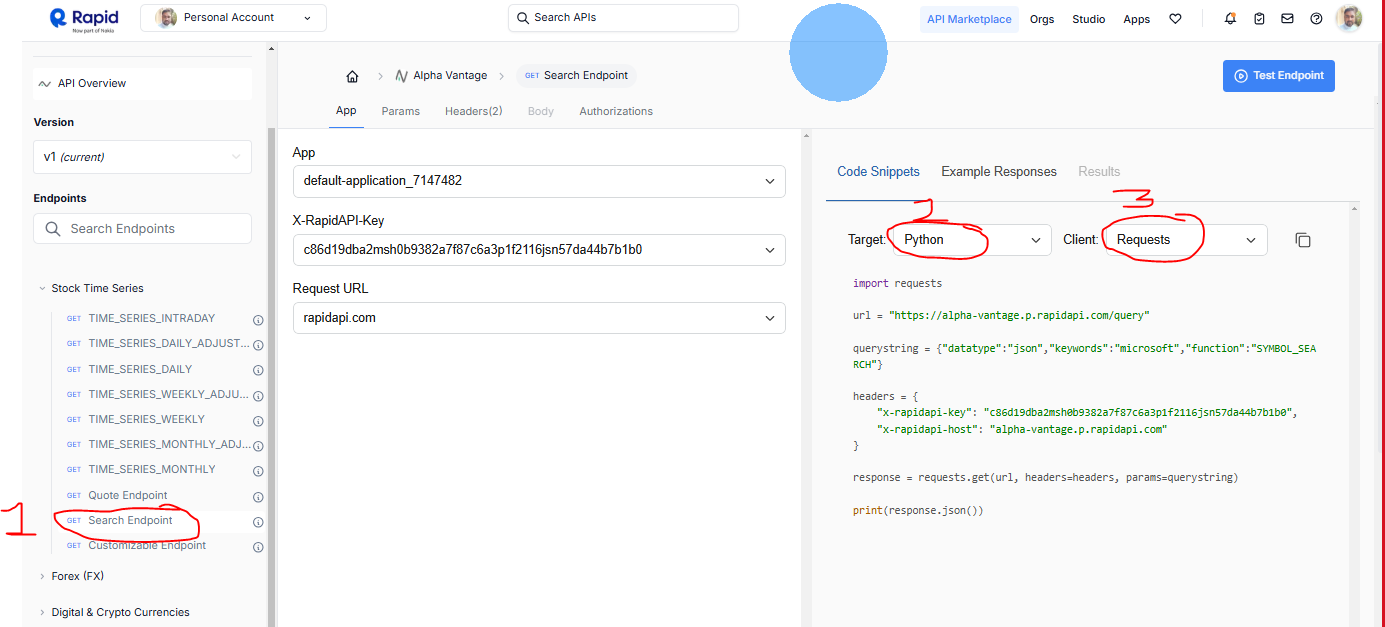

In [7]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [8]:
data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [9]:
type(data)

dict

In [10]:
data["bestMatches"]

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

### Extracting only required details
### Store name, region, currency

In [11]:
d = {}

for i in data["bestMatches"]:
    symbol = i["1. symbol"]
    d[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]

In [12]:
d

{'SBIN.BSE': ['State Bank of India', 'India/Bombay', 'INR'],
 'SBKFF': ['State Bank of India', 'United States', 'USD'],
 'SID.FRK': ['State Bank of India', 'Frankfurt', 'EUR'],
 'SBID.LON': ['State Bank of India GDR', 'United Kingdom', 'USD']}

### Get actual stock data for state bank of india SBIN.BSE

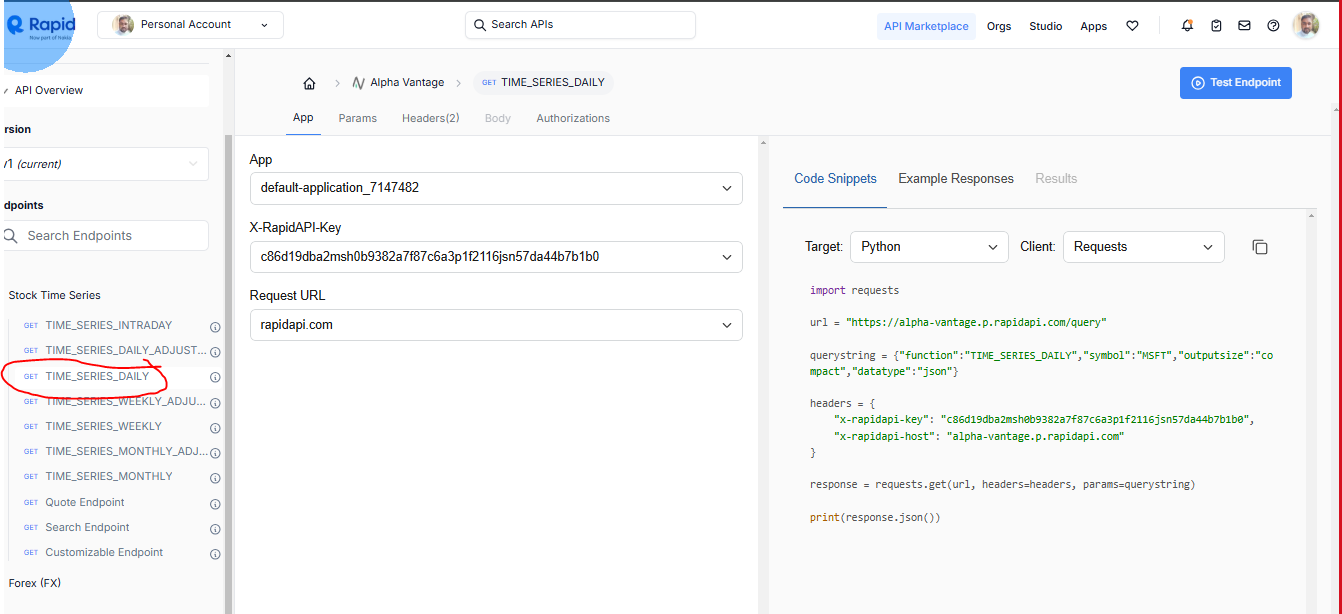

In [14]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data2 = response.json()

In [15]:
data2

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-02-14',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-02-14': {'1. open': '729.4500',
   '2. high': '732.7000',
   '3. low': '716.1500',
   '4. close': '722.0000',
   '5. volume': '895669'},
  '2025-02-13': {'1. open': '735.0000',
   '2. high': '737.3000',
   '3. low': '726.0500',
   '4. close': '727.3000',
   '5. volume': '605466'},
  '2025-02-12': {'1. open': '732.9500',
   '2. high': '738.3000',
   '3. low': '717.2500',
   '4. close': '733.2500',
   '5. volume': '550605'},
  '2025-02-11': {'1. open': '738.1500',
   '2. high': '740.0000',
   '3. low': '726.9000',
   '4. close': '731.0000',
   '5. volume': '826170'},
  '2025-02-10': {'1. open': '740.5500',
   '2. high': '744.0500',
   '3. low': '733.6000',
   '4. close': '736.8500',
   '5. volume': '788061'},
  '2025-02-07': {'1. open': '761.8000'

In [16]:
data2.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [17]:
daily = data2["Time Series (Daily)"]
daily

{'2025-02-14': {'1. open': '729.4500',
  '2. high': '732.7000',
  '3. low': '716.1500',
  '4. close': '722.0000',
  '5. volume': '895669'},
 '2025-02-13': {'1. open': '735.0000',
  '2. high': '737.3000',
  '3. low': '726.0500',
  '4. close': '727.3000',
  '5. volume': '605466'},
 '2025-02-12': {'1. open': '732.9500',
  '2. high': '738.3000',
  '3. low': '717.2500',
  '4. close': '733.2500',
  '5. volume': '550605'},
 '2025-02-11': {'1. open': '738.1500',
  '2. high': '740.0000',
  '3. low': '726.9000',
  '4. close': '731.0000',
  '5. volume': '826170'},
 '2025-02-10': {'1. open': '740.5500',
  '2. high': '744.0500',
  '3. low': '733.6000',
  '4. close': '736.8500',
  '5. volume': '788061'},
 '2025-02-07': {'1. open': '761.8000',
  '2. high': '761.8000',
  '3. low': '732.0500',
  '4. close': '737.0500',
  '5. volume': '1805880'},
 '2025-02-06': {'1. open': '769.6500',
  '2. high': '770.9500',
  '3. low': '750.0000',
  '4. close': '752.3500',
  '5. volume': '1384322'},
 '2025-02-05': {'1

In [19]:
import pandas as pd
df = pd.DataFrame(daily).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-02-14,729.4500,732.7000,716.1500,722.0000,895669
2025-02-13,735.0000,737.3000,726.0500,727.3000,605466
2025-02-12,732.9500,738.3000,717.2500,733.2500,550605
2025-02-11,738.1500,740.0000,726.9000,731.0000,826170
2025-02-10,740.5500,744.0500,733.6000,736.8500,788061
...,...,...,...,...,...
2024-09-27,802.0000,807.8500,798.4000,802.6500,669965
2024-09-26,795.1500,803.0000,791.5500,801.9000,432917
2024-09-25,798.2500,798.2500,788.6500,792.9500,524539
2024-09-24,800.0000,804.1000,796.6500,798.3500,427650


In [20]:
df.index

Index(['2025-02-14', '2025-02-13', '2025-02-12', '2025-02-11', '2025-02-10',
       '2025-02-07', '2025-02-06', '2025-02-05', '2025-02-04', '2025-02-03',
       '2025-01-31', '2025-01-30', '2025-01-29', '2025-01-28', '2025-01-27',
       '2025-01-24', '2025-01-23', '2025-01-22', '2025-01-21', '2025-01-20',
       '2025-01-17', '2025-01-16', '2025-01-15', '2025-01-14', '2025-01-13',
       '2025-01-10', '2025-01-09', '2025-01-08', '2025-01-07', '2025-01-06',
       '2025-01-03', '2025-01-02', '2025-01-01', '2024-12-31', '2024-12-30',
       '2024-12-27', '2024-12-26', '2024-12-24', '2024-12-23', '2024-12-20',
       '2024-12-19', '2024-12-18', '2024-12-17', '2024-12-16', '2024-12-13',
       '2024-12-12', '2024-12-11', '2024-12-10', '2024-12-09', '2024-12-06',
       '2024-12-05', '2024-12-04', '2024-12-03', '2024-12-02', '2024-11-29',
       '2024-11-28', '2024-11-27', '2024-11-26', '2024-11-25', '2024-11-22',
       '2024-11-21', '2024-11-19', '2024-11-18', '2024-11-14', '2024-11-13',

In [21]:
df.index = pd.to_datetime(df.index)

In [22]:
df.index

DatetimeIndex(['2025-02-14', '2025-02-13', '2025-02-12', '2025-02-11',
               '2025-02-10', '2025-02-07', '2025-02-06', '2025-02-05',
               '2025-02-04', '2025-02-03', '2025-01-31', '2025-01-30',
               '2025-01-29', '2025-01-28', '2025-01-27', '2025-01-24',
               '2025-01-23', '2025-01-22', '2025-01-21', '2025-01-20',
               '2025-01-17', '2025-01-16', '2025-01-15', '2025-01-14',
               '2025-01-13', '2025-01-10', '2025-01-09', '2025-01-08',
               '2025-01-07', '2025-01-06', '2025-01-03', '2025-01-02',
               '2025-01-01', '2024-12-31', '2024-12-30', '2024-12-27',
               '2024-12-26', '2024-12-24', '2024-12-23', '2024-12-20',
               '2024-12-19', '2024-12-18', '2024-12-17', '2024-12-16',
               '2024-12-13', '2024-12-12', '2024-12-11', '2024-12-10',
               '2024-12-09', '2024-12-06', '2024-12-05', '2024-12-04',
               '2024-12-03', '2024-12-02', '2024-11-29', '2024-11-28',
      

In [23]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [24]:
df = df.astype(float)

In [25]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2025-02-14,729.45,732.70,716.15,722.00,895669.0
2025-02-13,735.00,737.30,726.05,727.30,605466.0
2025-02-12,732.95,738.30,717.25,733.25,550605.0
2025-02-11,738.15,740.00,726.90,731.00,826170.0
2025-02-10,740.55,744.05,733.60,736.85,788061.0


In [27]:
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [28]:
df.index.name = "Date"

In [29]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-02-14,729.45,732.70,716.15,722.00,895669.0
2025-02-13,735.00,737.30,726.05,727.30,605466.0
2025-02-12,732.95,738.30,717.25,733.25,550605.0
2025-02-11,738.15,740.00,726.90,731.00,826170.0
2025-02-10,740.55,744.05,733.60,736.85,788061.0


In [31]:
df.to_csv("SBI.csv")

### Plotting above result

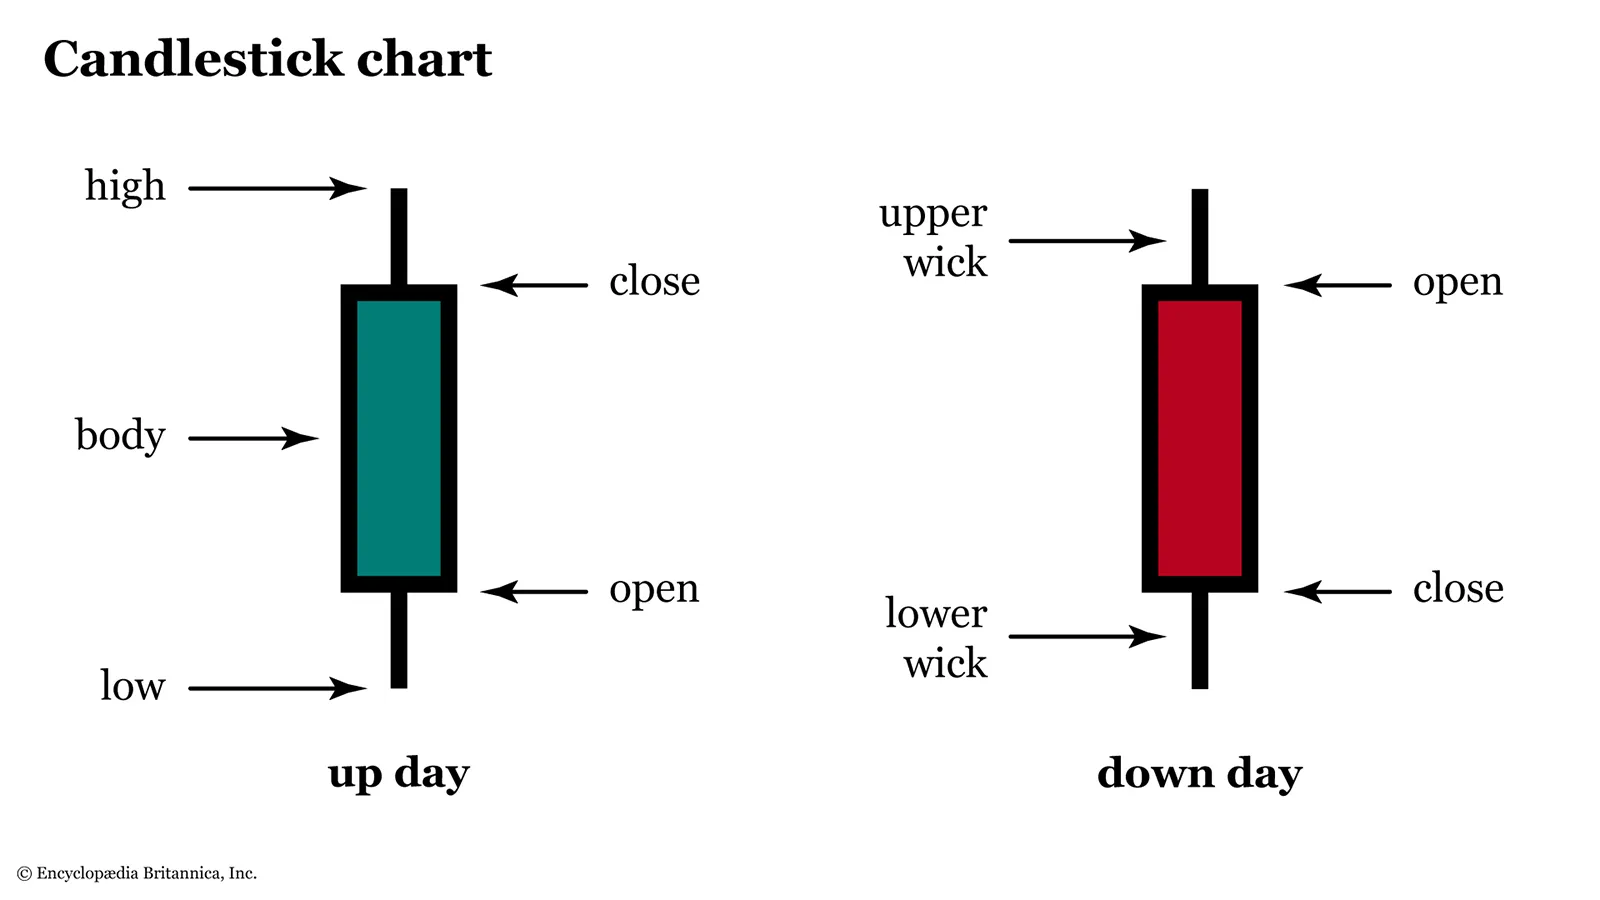

In [32]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\ravet adv python 3pm\repository\venv\lib\site-packages (5.24.1)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import plotly.graph_objects as go

In [37]:
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            open = df["1. open"],
            high = df["2. high"],
            low = df["3. low"],
            close = df["4. close"]
        )
    ]
)

fig.update_layout(width= 1200, height=800)

fig.show()

### Create a class to get data for any company

In [38]:
class StockAPI:

    def __init__(self):
        self.api_key = os.getenv("API_KEY")
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def symbol_search(self, company: str):
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()
        d = {}
        for i in data["bestMatches"]:
            symbol = i["1. symbol"]
            d[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]

        return d

    def get_daily_prices(self, symbol: str):
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()
        daily = data["Time Series (Daily)"]
        df = pd.DataFrame(daily).T
        df.index = pd.to_datetime(df.index)
        df.index.name = "Date"
        df = df.astype(float)
        return df

    def plot_candlestick(self, df: pd.DataFrame):
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )

        fig.update_layout(width=1200, height=800)

        return fig

### Using above class

In [39]:
client = StockAPI()

In [40]:
client.symbol_search("HDFC Bank")

{'HDB': ['HDFC Bank Ltd', 'United States', 'USD'],
 'HDFCBANK.BSE': ['HDFC Bank Limited', 'India/Bombay', 'INR'],
 'H1DB34.SAO': ['HDFC Bank Limited', 'Brazil/Sao Paolo', 'BRL'],
 'HDFA.FRK': ['HDFC Bank Limited', 'Frankfurt', 'EUR']}

In [41]:
df3 = client.get_daily_prices("HDFCBANK.BSE")
df3

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-02-14,1700.05,1700.35,1679.55,1695.00,460544.0
2025-02-13,1699.95,1714.00,1693.65,1697.75,84193.0
2025-02-12,1691.00,1711.60,1681.55,1707.05,143452.0
2025-02-11,1706.00,1710.55,1688.20,1699.90,395827.0
2025-02-10,1715.30,1723.75,1708.90,1715.40,189950.0
...,...,...,...,...,...
2024-10-01,1724.10,1742.00,1720.05,1726.15,115295.0
2024-09-30,1751.00,1752.00,1724.00,1732.00,725769.0
2024-09-27,1778.10,1778.10,1750.00,1752.85,232369.0


In [42]:
df3.to_csv("HDFCBank.csv")

In [43]:
fig2 = client.plot_candlestick(df3)
fig2.show()

In [44]:
client.symbol_search("Tesla")

{'TSLA': ['Tesla Inc', 'United States', 'USD'],
 'TL0.DEX': ['Tesla Inc', 'XETRA', 'EUR'],
 'TL0.FRK': ['Tesla Inc', 'Frankfurt', 'EUR'],
 'TSLA34.SAO': ['Tesla Inc', 'Brazil/Sao Paolo', 'BRL'],
 'TSLA.TRT': ['Tesla CDR (CAD Hedged)', 'Toronto', 'CAD'],
 'TL01.FRK': ['TESLA INC. CDR DL-001', 'Frankfurt', 'EUR']}

In [45]:
df4 = client.get_daily_prices("TSLA")
df4.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-02-14,360.62,362.00,347.50,355.84,68277279.0
2025-02-13,345.00,358.69,342.85,355.94,89441519.0
2025-02-12,329.94,346.40,329.12,336.51,105382729.0
2025-02-11,345.80,349.37,325.10,328.50,118543400.0
2025-02-10,356.21,362.70,350.51,350.73,77514903.0


In [46]:
df4.to_csv("Tesla.csv")

In [47]:
client.plot_candlestick(df4)